In [20]:
import thesis_database
import pandas as pd

project_name = 'hello'
experiment_name='skilled-reaching'
thesis_database.initialize_database(project_name)
experiment = thesis_database.Experiment.from_db(experiment_name = experiment_name)

with thesis_database.Cursor() as cursor:
    cursor.execute("""
    SELECT mouse_id, session_dir, session_num, all_trials.sum_reach_score_count, performed_trials.sum_reach_score_count,
       100*performed_trials.sum_reach_score_count/all_trials.sum_reach_score_count as "Percent Trials Engaged"
    FROM
        (SELECT mouse_id, session_dir, session_num, SUM(reach_score_count) AS "sum_reach_score_count"
        FROM
        (SELECT sessions.mouse_id, session_dir, session_num, reach_score, COUNT(reach_score) AS "reach_score_count"
            FROM trial_scores
                INNER JOIN trials ON trial_scores.trial_id = trials.trial_id
                INNER JOIN folders ON folders.folder_id = trials.folder_id
                INNER JOIN sessions ON sessions.session_id = folders.session_id
            WHERE reach_score != 0
            GROUP BY reach_score, session_dir, session_num, mouse_id) AS reach_score_count
        GROUP BY session_dir, mouse_id, session_num) AS all_trials
            INNER JOIN
                (SELECT mouse_id, session_dir, session_num, SUM(reach_score_count) AS "sum_reach_score_count"
                FROM
                (SELECT sessions.mouse_id, session_dir, session_num, reach_score, COUNT(reach_score) AS "reach_score_count"
                    FROM trial_scores
                        INNER JOIN trials ON trial_scores.trial_id = trials.trial_id
                        INNER JOIN folders ON folders.folder_id = trials.folder_id
                        INNER JOIN sessions ON sessions.session_id = folders.session_id
                    WHERE reach_score != 0 AND reach_score != 7
                    GROUP BY reach_score, session_dir, session_num, mouse_id) AS reach_score_count
                GROUP BY session_dir, mouse_id, session_num) AS performed_trials
                    USING (mouse_id, session_dir, session_num);
    """)
    engagement = [tuple([str(tup[0]), str(tup[1]), int(tup[2]), int(tup[3]), int(tup[4]), int(tup[5])]) for tup in cursor.fetchall()]



<AxesSubplot:title={'center':'% Performed Trials'}, xlabel='Training Day'>

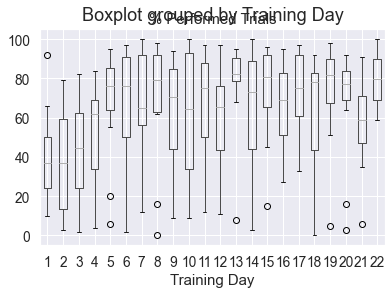

In [21]:
engagement = pd.DataFrame(engagement, columns=["mouse_id", "session_path", "Training Day", "All Trials", "Performed Trials", "% Performed Trials"])
engagement.boxplot(column="% Performed Trials", by="Training Day")

In [22]:
masked_engagement = engagement.mask(engagement["% Performed Trials"]>100)

dropped_engagement = engagement.drop(engagement["% Performed Trials"][engagement["% Performed Trials"]>100].index, inplace=True)
masked_engagement =masked_engagement.mask(masked_engagement['Training Day']>21)

In [23]:
# inmport
# training_day = list(engagement["Training Day"])
# plt.boxplot(list(zip(engagement["Training Day"], engagement["Percent Trials Performed"])))

In [24]:
import seaborn
import matplotlib.pyplot as plt

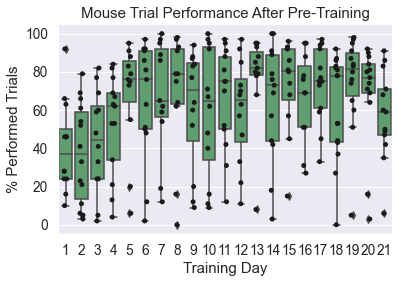

In [25]:
f, ax = plt.subplots()
seaborn.set_theme(context='poster', style="whitegrid", font_scale=1.25)
seaborn.set(font_scale=1.25)
seaborn.boxplot(x="Training Day", y="% Performed Trials", data=masked_engagement, color='g')
seaborn.stripplot(x="Training Day", y="% Performed Trials", data=masked_engagement, color='k')
ax.set_title("Mouse Trial Performance After Pre-Training")
ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"])
plt.subplots_adjust(bottom=0.15)
plt.savefig('/Users/Krista/Desktop/mouse_trial_performance.pdf')

In [26]:
import matplotlib.pyplot as plt

plt.savefig(box_plot, '/Users/Krista/Desktop/mouse_trial_performance.png')



NameError: name 'box_plot' is not defined